<a href="https://colab.research.google.com/github/CansecoSergio/python-data-science/blob/main/M10%20Sergio%20Canseco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reto Módulo 10 Sergio Canseco**


## 1. En algún entorno Spark, carga los datos y elimina las variables innecesarias

**Instalación y configuración del ambiente de PySpark**

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [3]:
!ls

drive  sample_data  spark-3.1.1-bin-hadoop3.2  spark-3.1.1-bin-hadoop3.2.tgz


In [4]:
import findspark
findspark.init()
from pyspark import SparkContext, SparkConf, SQLContext
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Propiedad para mejor formato de tablas
spark

Configuración de Google Drive

In [6]:
from google.colab import drive
drive.mount("/content/drive")
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
drive/  sample_data/  spark-3.1.1-bin-hadoop3.2/  spark-3.1.1-bin-hadoop3.2.tgz


**Lectura de información**

In [7]:
df_pollution = spark.read.csv('/content/drive/MyDrive/Archivos Collab/M10/Monterrey Pollution Data 2.csv', header=True, sep=",", inferSchema=True)
df_pollution.show(5, truncate = False)

+---------+-----+---+-------+-------+----+----+----+----+----+---+----+-----+-----+-----+---+-----+----+---+---+
|Date     |Month|Day|DayWeek|WeekDay|Hour|CO  |NO  |NO2 |NOX |O3 |PM10|PM2.5|PRS  |RAINF|RH |SR   |TOUT|WSR|WDV|
+---------+-----+---+-------+-------+----+----+----+----+----+---+----+-----+-----+-----+---+-----+----+---+---+
|01-ene-15|1    |1  |jue    |5      |1   |2.51|10.2|12.9|23.1|10 |139 |80   |725.4|0.01 |96 |0.0  |3.91|7.2|344|
|01-ene-15|1    |1  |jue    |5      |2   |2.41|9.2 |11.6|20.8|7  |42  |29   |725.0|0.02 |96 |0.0  |3.81|6.3|341|
|01-ene-15|1    |1  |jue    |5      |3   |2.39|8.1 |11.8|19.9|7  |23  |9    |724.4|0.0  |96 |0.0  |3.85|5.2|346|
|01-ene-15|1    |1  |jue    |5      |5   |2.26|5.3 |8.9 |14.2|7  |23  |14   |724.0|0.01 |96 |0.0  |3.79|5.6|336|
|01-ene-15|1    |1  |jue    |5      |8   |2.25|7.2 |10.2|17.4|5  |15  |8    |724.3|0.0  |96 |0.023|3.93|4.8|354|
+---------+-----+---+-------+-------+----+----+----+----+----+---+----+-----+-----+-----+---+---

In [9]:
print("Número de registros: " + str(df_pollution.count()))
print("Número de columnas: " + str(len(df_pollution.columns)))

Número de registros: 3859
Número de columnas: 20


In [10]:
df_pollution.describe()

summary,Date,Month,Day,DayWeek,WeekDay,Hour,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SR,TOUT,WSR,WDV
count,3859,3859,3859,3859,3859,3859,3859,3859,3859,3859,3859,3859,3859,3859,3859,3859,3859,3859,3859,3859
mean,null,4.820678932365898,15.76444674786214,null,4.075926405804613,12.037833635656906,1.8006219227779212,13.503653796320318,17.539284788381988,30.973257321216455,22.658719875615443,86.04949468774294,27.675822752008294,719.629955947137,0.002650945840632...,71.04845814977973,0.1825822752311473,22.0189686447266,7.331458927183208,127.52215599896346
stddev,null,2.8352877939176295,9.157213402989008,null,1.9730397456778965,6.869487540512553,0.8720340991225567,26.856244699079294,13.301006799154928,36.090498039388464,16.51056131885926,49.00887433131967,16.849434279135153,3.6959485297554657,0.04244711534165332,18.33461472259281,0.26160202836729035,7.545535084646807,3.8282164629573447,96.51530962028535
min,01-abr-15,1,1,dom,1,0,0.29,2.3,0.4,3.1,2,8,5,708.4,0.0,12,0.0,3.03,0.9,0
max,31/08/2015,11,31,vie,7,23,8.56,414.3,99.2,436.0,92,494,123,734.3,2.4,96,0.934,38.52,21.2,360


In [19]:
#Se renombra la columna PM2.5 para evitar el . en el nombre
df_pollution = df_pollution.withColumnRenamed('PM2.5', 'PM2_5')

In [20]:
# Mostrar solo datos de columnas de interés
df_pollution.describe(['O3', 'PM2_5'])

summary,O3,PM2_5
count,3859,3859
mean,22.658719875615443,27.675822752008294
stddev,16.51056131885926,16.849434279135153
min,2,5
max,92,123


In [21]:
#Se imprime el schema
df_pollution.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Day: integer (nullable = true)
 |-- DayWeek: string (nullable = true)
 |-- WeekDay: integer (nullable = true)
 |-- Hour: integer (nullable = true)
 |-- CO: double (nullable = true)
 |-- NO: double (nullable = true)
 |-- NO2: double (nullable = true)
 |-- NOX: double (nullable = true)
 |-- O3: integer (nullable = true)
 |-- PM10: integer (nullable = true)
 |-- PM2_5: integer (nullable = true)
 |-- PRS: double (nullable = true)
 |-- RAINF: double (nullable = true)
 |-- RH: integer (nullable = true)
 |-- SR: double (nullable = true)
 |-- TOUT: double (nullable = true)
 |-- WSR: double (nullable = true)
 |-- WDV: integer (nullable = true)



**Preprocesado de datos**

In [23]:
#Revisisón de columnas para validar que no haya datos nan
from pyspark.sql.functions import isnan, when, count, col, isnull

df_pollution.select([count(when(isnan(c), c)).alias(c) for c in df_pollution.columns]).show()

+----+-----+---+-------+-------+----+---+---+---+---+---+----+-----+---+-----+---+---+----+---+---+
|Date|Month|Day|DayWeek|WeekDay|Hour| CO| NO|NO2|NOX| O3|PM10|PM2_5|PRS|RAINF| RH| SR|TOUT|WSR|WDV|
+----+-----+---+-------+-------+----+---+---+---+---+---+----+-----+---+-----+---+---+----+---+---+
|   0|    0|  0|      0|      0|   0|  0|  0|  0|  0|  0|   0|    0|  0|    0|  0|  0|   0|  0|  0|
+----+-----+---+-------+-------+----+---+---+---+---+---+----+-----+---+-----+---+---+----+---+---+



In [26]:
#Revisión de columnas para validar que no haya valores nulos
df_pollution.select([count(when(isnull(c), c)).alias(c) for c in df_pollution.columns]).show()

+----+-----+---+-------+-------+----+---+---+---+---+---+----+-----+---+-----+---+---+----+---+---+
|Date|Month|Day|DayWeek|WeekDay|Hour| CO| NO|NO2|NOX| O3|PM10|PM2_5|PRS|RAINF| RH| SR|TOUT|WSR|WDV|
+----+-----+---+-------+-------+----+---+---+---+---+---+----+-----+---+-----+---+---+----+---+---+
|   0|    0|  0|      0|      0|   0|  0|  0|  0|  0|  0|   0|    0|  0|    0|  0|  0|   0|  0|  0|
+----+-----+---+-------+-------+----+---+---+---+---+---+----+-----+---+-----+---+---+----+---+---+



In [34]:
#Se crea una copia para trabajar unicamente con el dataframe final
df_pollution_clean = df_pollution.select("*")

#Se elimina la variable Date ya que no es relevante y solo se almacena el año 2015
df_pollution_clean = df_pollution_clean.drop(df_pollution_clean.Date)

#Se elimina DayWeek ya que no es relevante
df_pollution_clean = df_pollution_clean.drop(df_pollution_clean.DayWeek)

#Se eliminan las columnas de los contaminantes precursores (CO, NO, NO2, NOx, PM10)
#Únicamente nos interesan los contaminantes O3 y PM2.5
df_pollution_clean = df_pollution_clean.drop(df_pollution_clean.CO)
df_pollution_clean = df_pollution_clean.drop(df_pollution_clean.NO)
df_pollution_clean = df_pollution_clean.drop(df_pollution_clean.NO2)
df_pollution_clean = df_pollution_clean.drop(df_pollution_clean.NOX)
df_pollution_clean = df_pollution_clean.drop(df_pollution_clean.PM10)

# Se eliminan filas duplicadas si es que existen
df_pollution_clean = df_pollution_clean.dropDuplicates()


In [35]:
df_pollution_clean.describe().toPandas().T

,0,1,2,3,4
summary,count,mean,stddev,min,max
Month,3859,4.820678932365898,2.835287793917631,1,11
Day,3859,15.76444674786214,9.157213402989003,1,31
WeekDay,3859,4.075926405804613,1.973039745677894,1,7
Hour,3859,12.037833635656906,6.869487540512549,0,23
O3,3859,22.658719875615443,16.510561318859263,2,92
PM2_5,3859,27.675822752008294,16.84943427913517,5,123
PRS,3859,719.6299559471364,3.6959485297561017,708.4,734.3
RAINF,3859,0.0026509458406322856,0.04244711534165339,0.0,2.4
RH,3859,71.04845814977973,18.33461472259284,12,96


## 2.- Análisis de correlación, para determinar qué variables ambientales o de tiempo afectan la concentración de contaminantes O3 y PM2.5

Correlaciones

In [36]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

In [37]:
df_pollution_clean.printSchema()

root
 |-- Month: integer (nullable = true)
 |-- Day: integer (nullable = true)
 |-- WeekDay: integer (nullable = true)
 |-- Hour: integer (nullable = true)
 |-- O3: integer (nullable = true)
 |-- PM2_5: integer (nullable = true)
 |-- PRS: double (nullable = true)
 |-- RAINF: double (nullable = true)
 |-- RH: integer (nullable = true)
 |-- SR: double (nullable = true)
 |-- TOUT: double (nullable = true)
 |-- WSR: double (nullable = true)
 |-- WDV: integer (nullable = true)



In [38]:
vector_col = "corr_features"

assembler = VectorAssembler(inputCols=df_pollution_clean.columns, outputCol=vector_col)
df_vector = assembler.transform(df_pollution_clean)

In [39]:
df_vector.select(vector_col).show(10, truncate=False)

+------------------------------------------------------------------+
|corr_features                                                     |
+------------------------------------------------------------------+
|[1.0,26.0,2.0,2.0,4.0,14.0,726.1,0.0,43.0,0.0,14.39,1.3,284.0]    |
|[2.0,6.0,6.0,2.0,19.0,5.0,728.2,0.0,92.0,0.0,9.6,6.6,103.0]       |
|[2.0,14.0,7.0,17.0,13.0,13.0,723.9,0.0,89.0,0.032,15.28,3.9,102.0]|
|[2.0,18.0,4.0,13.0,37.0,9.0,725.9,0.0,56.0,0.67,15.63,11.3,114.0] |
|[3.0,25.0,4.0,19.0,41.0,77.0,716.0,0.0,80.0,0.0,21.96,7.6,106.0]  |
|[3.0,26.0,5.0,2.0,13.0,8.0,716.8,0.0,84.0,0.0,21.09,3.9,205.0]    |
|[4.0,1.0,4.0,11.0,35.0,19.0,718.0,0.0,67.0,0.535,25.66,7.5,30.0]  |
|[4.0,11.0,7.0,21.0,9.0,6.0,718.2,0.0,96.0,0.0,19.41,4.0,316.0]    |
|[5.0,28.0,5.0,9.0,13.0,9.0,720.2,0.0,87.0,0.273,24.81,6.3,73.0]   |
|[6.0,24.0,4.0,17.0,22.0,29.0,721.1,0.0,74.0,0.12,26.23,13.2,121.0]|
+------------------------------------------------------------------+
only showing top 10 rows



In [55]:
# Se calcula únicamente la correlación de Pearson
corr_pearson = Correlation.corr(df_vector, vector_col, method = 'pearson')
print("Pearson Corr Matrix\n",corr_pearson.collect()[0]["pearson({})".format(vector_col)].values)

Pearson Corr Matrix
 [ 1.         -0.06681874  0.00577055  0.0054055   0.21388996 -0.05753043
 -0.43358683 -0.0108237  -0.18114563  0.1609054   0.67349906  0.26464103
 -0.22102167 -0.06681874  1.         -0.00598214 -0.00155594  0.0894571
 -0.0136505  -0.03661393 -0.02347321 -0.2098234   0.06236327  0.11085136
  0.04526884  0.0283507   0.00577055 -0.00598214  1.         -0.00860741
  0.01599319  0.01675521  0.06762479  0.03130008  0.0775407  -0.0104502
 -0.06985465  0.0251707  -0.04951724  0.0054055  -0.00155594 -0.00860741
  1.          0.2283809   0.09788411 -0.04785694  0.0207946  -0.36251786
  0.04857046  0.21874229  0.42407231 -0.12821527  0.21388996  0.0894571
  0.01599319  0.2283809   1.         -0.00881133 -0.21973222 -0.03014244
 -0.65558821  0.6919266   0.52715429  0.46625389 -0.19879824 -0.05753043
 -0.0136505   0.01675521  0.09788411 -0.00881133  1.         -0.17802928
  0.03074583  0.03615375 -0.03730585  0.08370345 -0.07117816 -0.03237315
 -0.43358683 -0.03661393  0.06762

In [60]:
#Visualización de correlaciones con HeatMapz

!pip install heatmapz

import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from heatmap import corrplot

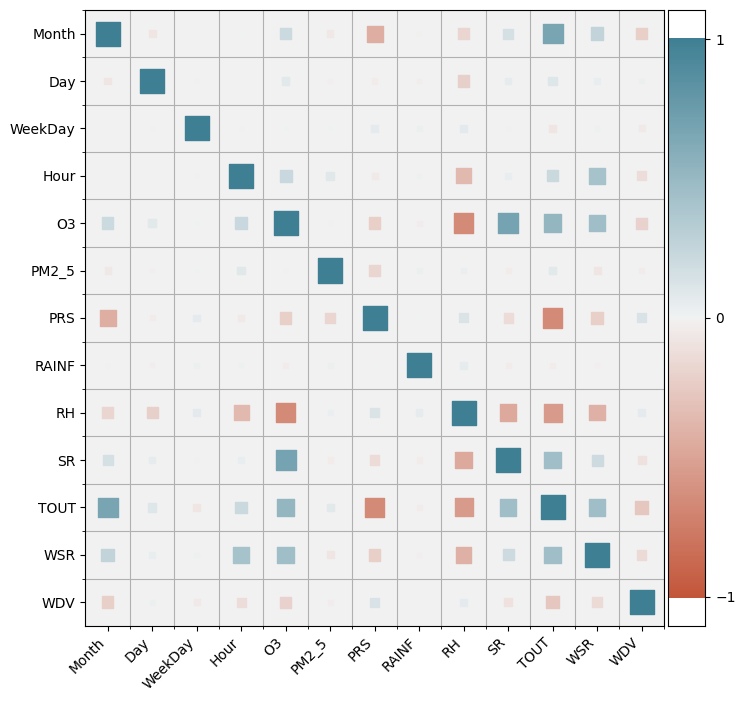

In [61]:
vector_col = "corr_features"
pearson_corr_arr = np.matrix(corr_pearson.collect()[0]["pearson({})".format(vector_col)].values).reshape(len(df_pollution_clean.columns), len(df_pollution_clean.columns))

# Note que data debe estar en formato matriz de numpy
df_clean_columns = df_pollution_clean.columns
pearson_corr_df = pd.DataFrame(data=pearson_corr_arr, index=df_clean_columns, columns=df_clean_columns)

plt.figure(figsize=(8, 8))
# Aquí se puede pasar directamente un Spark Dataframe
corrplot(pearson_corr_df ,size_scale=300)

### **Se observa que si hay correlaciones negativas y esto indica que las variables se mueven en direcciones opuestas, es decir, se incrementa una, la otra decrementa.**

## 3.- Confirma estas relaciones usando gráficos de dispersión

Se realizan los diagramas de dispersión de las variables con correlación negativa

3859 3859


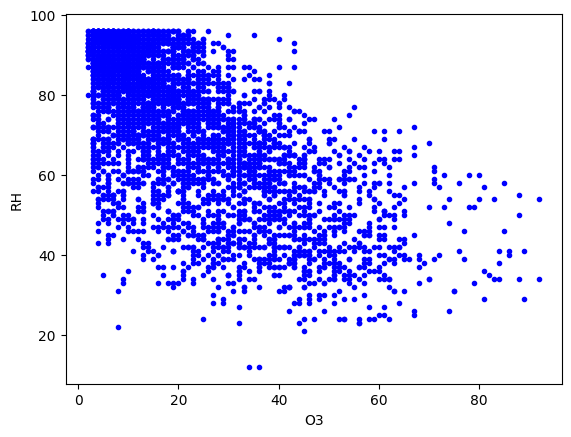

In [62]:
#Realizamos diagrama de dispersión de las variables O3 y RH
#Select data
df_temp_O3 = df_pollution_clean.select("O3")
df_temp_RH = df_pollution_clean.select("RH")
print(df_temp_O3.count(), df_temp_RH.count())

#Convert to array
arr_O3 = df_temp_O3.rdd.map(lambda row : row.O3).collect()
arr_RH = df_temp_RH.rdd.map(lambda row : row.RH).collect()

#Plot
plt.plot(arr_O3, arr_RH, 'b.')
plt.xlabel("O3")
plt.ylabel("RH")
plt.show()

3859 3859


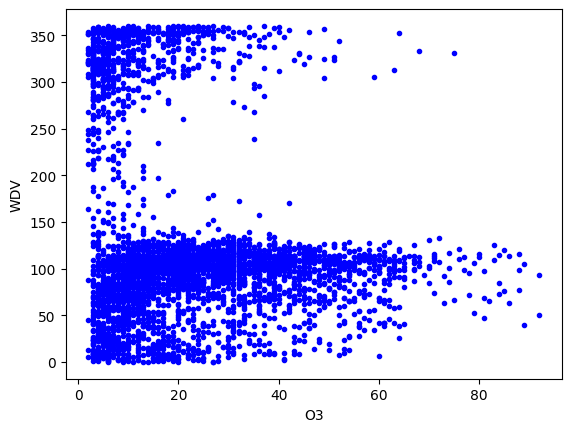

In [63]:
#Realizamos diagrama de dispersión de las variables O3 y WDV
#Select data
df_temp_O3 = df_pollution_clean.select("O3")
df_temp_WDV = df_pollution_clean.select("WDV")
print(df_temp_O3.count(), df_temp_WDV.count())

#Convert to array
arr_O3 = df_temp_O3.rdd.map(lambda row : row.O3).collect()
arr_WDV = df_temp_WDV.rdd.map(lambda row : row.WDV).collect()

#Plot
plt.plot(arr_O3, arr_WDV, 'b.')
plt.xlabel("O3")
plt.ylabel("WDV")
plt.show()

3859 3859


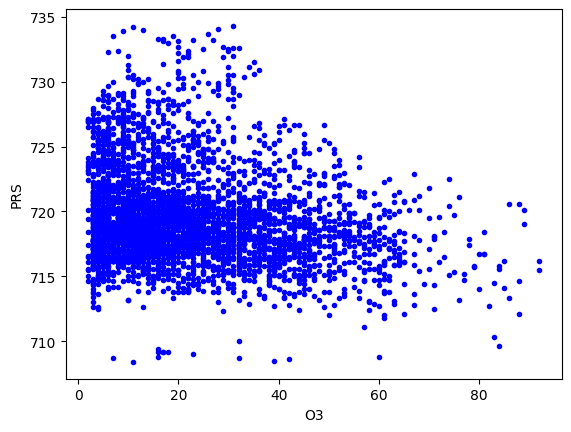

In [64]:
#Realizamos diagrama de dispersión de las variables O3 y PRS
#Select data
df_temp_O3 = df_pollution_clean.select("O3")
df_temp_PRS = df_pollution_clean.select("PRS")
print(df_temp_O3.count(), df_temp_PRS.count())

#Convert to array
arr_O3 = df_temp_O3.rdd.map(lambda row : row.O3).collect()
arr_PRS = df_temp_PRS.rdd.map(lambda row : row.PRS).collect()

#Plot
plt.plot(arr_O3, arr_PRS, 'b.')
plt.xlabel("O3")
plt.ylabel("PRS")
plt.show()

3859 3859


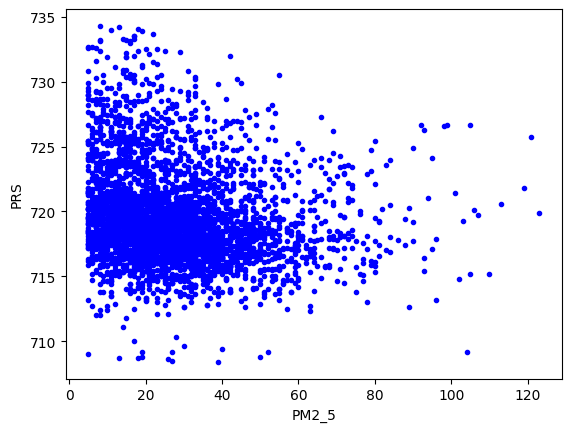

In [66]:
#Realizamos diagrama de dispersión de las variables PM2_5 y PRS
#Select data
df_temp_PM2_5 = df_pollution_clean.select("PM2_5")
df_temp_PRS = df_pollution_clean.select("PRS")
print(df_temp_PM2_5.count(), df_temp_PRS.count())

#Convert to array
arr_PM2_5 = df_temp_PM2_5.rdd.map(lambda row : row.PM2_5).collect()
arr_PRS = df_temp_PRS.rdd.map(lambda row : row.PRS).collect()

#Plot
plt.plot(arr_PM2_5, arr_PRS, 'b.')
plt.xlabel("PM2_5")
plt.ylabel("PRS")
plt.show()

## 4.- Crea modelos de regresión para predecir estos contaminantes (O3 y PM2_5)

In [70]:
df_pollution_clean.printSchema()

root
 |-- Month: integer (nullable = true)
 |-- Day: integer (nullable = true)
 |-- WeekDay: integer (nullable = true)
 |-- Hour: integer (nullable = true)
 |-- O3: integer (nullable = true)
 |-- PM2_5: integer (nullable = true)
 |-- PRS: double (nullable = true)
 |-- RAINF: double (nullable = true)
 |-- RH: integer (nullable = true)
 |-- SR: double (nullable = true)
 |-- TOUT: double (nullable = true)
 |-- WSR: double (nullable = true)
 |-- WDV: integer (nullable = true)



Predicción variable O3

In [85]:
from pyspark.ml.feature import VectorAssembler

assembler_O3 = VectorAssembler(inputCols=['Month', 'Day', 'WeekDay', 'Hour', 'PM2_5', 'PRS', 'RAINF', 'RH', 'SR', 'TOUT', 'WSR', 'WDV'], outputCol = 'Attributes')
output_O3 = assembler_O3.transform(df_pollution_clean)
output_O3.show(5, truncate = False)

+-----+---+-------+----+---+-----+-----+-----+---+-----+-----+----+---+-------------------------------------------------------------+
|Month|Day|WeekDay|Hour|O3 |PM2_5|PRS  |RAINF|RH |SR   |TOUT |WSR |WDV|Attributes                                                   |
+-----+---+-------+----+---+-----+-----+-----+---+-----+-----+----+---+-------------------------------------------------------------+
|1    |26 |2      |2   |4  |14   |726.1|0.0  |43 |0.0  |14.39|1.3 |284|[1.0,26.0,2.0,2.0,14.0,726.1,0.0,43.0,0.0,14.39,1.3,284.0]   |
|2    |6  |6      |2   |19 |5    |728.2|0.0  |92 |0.0  |9.6  |6.6 |103|[2.0,6.0,6.0,2.0,5.0,728.2,0.0,92.0,0.0,9.6,6.6,103.0]       |
|2    |14 |7      |17  |13 |13   |723.9|0.0  |89 |0.032|15.28|3.9 |102|[2.0,14.0,7.0,17.0,13.0,723.9,0.0,89.0,0.032,15.28,3.9,102.0]|
|2    |18 |4      |13  |37 |9    |725.9|0.0  |56 |0.67 |15.63|11.3|114|[2.0,18.0,4.0,13.0,9.0,725.9,0.0,56.0,0.67,15.63,11.3,114.0] |
|3    |25 |4      |19  |41 |77   |716.0|0.0  |80 |0.0  |21.96|

In [87]:
#Input vs Output
finalized_data_O3 = output_O3.select("Attributes","O3")
finalized_data_O3.show(10, truncate = False)

+-------------------------------------------------------------+---+
|Attributes                                                   |O3 |
+-------------------------------------------------------------+---+
|[1.0,26.0,2.0,2.0,14.0,726.1,0.0,43.0,0.0,14.39,1.3,284.0]   |4  |
|[2.0,6.0,6.0,2.0,5.0,728.2,0.0,92.0,0.0,9.6,6.6,103.0]       |19 |
|[2.0,14.0,7.0,17.0,13.0,723.9,0.0,89.0,0.032,15.28,3.9,102.0]|13 |
|[2.0,18.0,4.0,13.0,9.0,725.9,0.0,56.0,0.67,15.63,11.3,114.0] |37 |
|[3.0,25.0,4.0,19.0,77.0,716.0,0.0,80.0,0.0,21.96,7.6,106.0]  |41 |
|[3.0,26.0,5.0,2.0,8.0,716.8,0.0,84.0,0.0,21.09,3.9,205.0]    |13 |
|[4.0,1.0,4.0,11.0,19.0,718.0,0.0,67.0,0.535,25.66,7.5,30.0]  |35 |
|[4.0,11.0,7.0,21.0,6.0,718.2,0.0,96.0,0.0,19.41,4.0,316.0]   |9  |
|[5.0,28.0,5.0,9.0,9.0,720.2,0.0,87.0,0.273,24.81,6.3,73.0]   |13 |
|[6.0,24.0,4.0,17.0,29.0,721.1,0.0,74.0,0.12,26.23,13.2,121.0]|22 |
+-------------------------------------------------------------+---+
only showing top 10 rows



División de los datos para train y test

In [89]:
train_data_O3, test_data_O3 = finalized_data_O3.randomSplit([0.8,0.2])

print(train_data_O3.count())
print(test_data_O3.count())

3088
771


In [90]:
from pyspark.ml.regression import RandomForestRegressor
rfr_O3 = RandomForestRegressor(featuresCol = 'Attributes', labelCol = 'O3')

In [91]:
#Entrenamiento
rfr_O3 = rfr_O3.fit(train_data_O3)

#Para predecir en el set de test
pred_rfr_O3 = rfr_O3.transform(test_data_O3)

In [92]:
pred_rfr_O3.select('Attributes', 'O3', 'prediction').show(10)

+--------------------+---+------------------+
|          Attributes| O3|        prediction|
+--------------------+---+------------------+
|[2.0,14.0,7.0,17....| 13|10.699336643636888|
|[2.0,18.0,4.0,13....| 37|  40.6823900308714|
|[3.0,25.0,4.0,19....| 41|17.829990386166212|
|[3.0,26.0,5.0,2.0...| 13| 9.132714414082455|
|[4.0,1.0,4.0,11.0...| 35| 38.08461403503067|
|[4.0,11.0,7.0,21....|  9| 10.72210243692069|
|[7.0,3.0,6.0,15.0...| 34| 45.37471788936019|
|[7.0,29.0,4.0,13....| 70|47.773404337504935|
|[1.0,8.0,5.0,8.0,...| 17|17.243286931808285|
|[1.0,20.0,3.0,20....|  5|22.245766520720657|
+--------------------+---+------------------+
only showing top 10 rows



Predicción variable PM2_5

In [93]:
from pyspark.ml.feature import VectorAssembler

assembler_PM = VectorAssembler(inputCols=['Month', 'Day', 'WeekDay', 'Hour', 'O3', 'PRS', 'RAINF', 'RH', 'SR', 'TOUT', 'WSR', 'WDV'], outputCol = 'Attributes')
output_PM = assembler_PM.transform(df_pollution_clean)
output_PM.show(5, truncate = False)

+-----+---+-------+----+---+-----+-----+-----+---+-----+-----+----+---+-------------------------------------------------------------+
|Month|Day|WeekDay|Hour|O3 |PM2_5|PRS  |RAINF|RH |SR   |TOUT |WSR |WDV|Attributes                                                   |
+-----+---+-------+----+---+-----+-----+-----+---+-----+-----+----+---+-------------------------------------------------------------+
|1    |26 |2      |2   |4  |14   |726.1|0.0  |43 |0.0  |14.39|1.3 |284|[1.0,26.0,2.0,2.0,4.0,726.1,0.0,43.0,0.0,14.39,1.3,284.0]    |
|2    |6  |6      |2   |19 |5    |728.2|0.0  |92 |0.0  |9.6  |6.6 |103|[2.0,6.0,6.0,2.0,19.0,728.2,0.0,92.0,0.0,9.6,6.6,103.0]      |
|2    |14 |7      |17  |13 |13   |723.9|0.0  |89 |0.032|15.28|3.9 |102|[2.0,14.0,7.0,17.0,13.0,723.9,0.0,89.0,0.032,15.28,3.9,102.0]|
|2    |18 |4      |13  |37 |9    |725.9|0.0  |56 |0.67 |15.63|11.3|114|[2.0,18.0,4.0,13.0,37.0,725.9,0.0,56.0,0.67,15.63,11.3,114.0]|
|3    |25 |4      |19  |41 |77   |716.0|0.0  |80 |0.0  |21.96|

In [94]:
#Input vs Output
finalized_data_PM = output_PM.select("Attributes","PM2_5")
finalized_data_PM.show(10, truncate = False)

+-------------------------------------------------------------+-----+
|Attributes                                                   |PM2_5|
+-------------------------------------------------------------+-----+
|[1.0,26.0,2.0,2.0,4.0,726.1,0.0,43.0,0.0,14.39,1.3,284.0]    |14   |
|[2.0,6.0,6.0,2.0,19.0,728.2,0.0,92.0,0.0,9.6,6.6,103.0]      |5    |
|[2.0,14.0,7.0,17.0,13.0,723.9,0.0,89.0,0.032,15.28,3.9,102.0]|13   |
|[2.0,18.0,4.0,13.0,37.0,725.9,0.0,56.0,0.67,15.63,11.3,114.0]|9    |
|[3.0,25.0,4.0,19.0,41.0,716.0,0.0,80.0,0.0,21.96,7.6,106.0]  |77   |
|[3.0,26.0,5.0,2.0,13.0,716.8,0.0,84.0,0.0,21.09,3.9,205.0]   |8    |
|[4.0,1.0,4.0,11.0,35.0,718.0,0.0,67.0,0.535,25.66,7.5,30.0]  |19   |
|[4.0,11.0,7.0,21.0,9.0,718.2,0.0,96.0,0.0,19.41,4.0,316.0]   |6    |
|[5.0,28.0,5.0,9.0,13.0,720.2,0.0,87.0,0.273,24.81,6.3,73.0]  |9    |
|[6.0,24.0,4.0,17.0,22.0,721.1,0.0,74.0,0.12,26.23,13.2,121.0]|29   |
+-------------------------------------------------------------+-----+
only showing top 10 

In [95]:
train_data_PM, test_data_PM = finalized_data_PM.randomSplit([0.8,0.2])

print(train_data_PM.count())
print(test_data_PM.count())

3095
764


In [96]:
from pyspark.ml.regression import RandomForestRegressor
rfr_PM = RandomForestRegressor(featuresCol = 'Attributes', labelCol = 'PM2_5')

In [97]:
#Entrenamiento
rfr_PM = rfr_PM.fit(train_data_PM)

#Para predecir en el set de test
pred_rfr_PM = rfr_PM.transform(test_data_PM)

In [98]:
pred_rfr_PM.select('Attributes', 'PM2_5', 'prediction').show(10)

+--------------------+-----+------------------+
|          Attributes|PM2_5|        prediction|
+--------------------+-----+------------------+
|[2.0,14.0,7.0,17....|   13|33.115985967775025|
|[10.0,14.0,4.0,1....|   24| 29.15119138451721|
|[3.0,8.0,1.0,19.0...|   37|30.065119605592493|
|[3.0,23.0,2.0,4.0...|   26| 32.18058630870241|
|[7.0,8.0,4.0,12.0...|   38|27.477441683715625|
|[1.0,9.0,6.0,3.0,...|   25| 20.22981394799398|
|[3.0,2.0,2.0,0.0,...|   35|23.738643075838727|
|[8.0,21.0,6.0,20....|   36|30.849120462253445|
|[1.0,15.0,5.0,21....|   31| 33.67756255209054|
|[2.0,8.0,1.0,18.0...|   54|31.986322117583363|
+--------------------+-----+------------------+
only showing top 10 rows



## 5.- Contesta las siguientes preguntas:

a. ¿Podemos decir que la contaminación por O3 o PM2.5 está ligada al tráfico
vehicular?, ¿Tendría efectos sobre la contaminación implantar un esquema de verificación vehicular?

**Es posible concluir que los índices de contaminación están ligados al tráfico ya que las variables de los contaminantes tienen correlación positiva sobre las variables de estudio, además de que los valores más altos aparecen en horarios de las 12 a 18 hrs.**

b. Dado un reporte del pronóstico del clima dado en la mañana, ¿podemos predecir que habrá una contingencia ambiental debido a que los contaminantes en el aire rebasarán los límites permitidos por la norma?

**Si, con los modelos desarrollados es posible que a partir del pronóstico podamos tener valores aproximados del nivel de los contaminantes principales.**

c. En tus propias palabras, ¿qué condiciones climáticas se deben cumplir para tener altos niveles de contaminación de O3?, ¿Y PM2.5?

**Es posible concluir que con Presión(PRS) media, una temperatura (TOUT) alta y una velocidad del viento (WSR) baja o media los niveles de contaminación incrementen.**